# Lab 2- Discrete Fourier Transform and Fast Fourier Transform

## Course: Discrete Time Systems

### 2º Biomedical Engineering Degree

#### Professors: Luca Martino, Óscar Barquero Pérez


## Objective 


The main objective of this lab is to understand how to obtian the spectrum of sequences using the Discrete Fourier Transform and its implementation using the Fast Fourier Transform, which is implemented in the computers and digital electronic systems.



## Introduction

In Python the spectrum of sequences is computed using the functions *numpy.fft.fft* and the inverse *numpy.fft.ifft*. Both are functions implemented in the package fft from the numpy module.

We advice to read carefully the implementation details of the DFT in numpy, that you can find herein [numpy dtf](https://docs.scipy.org/doc/numpy/reference/routines.fft.html).

The followign explanation of the numpy method is taking directly from the documentation 


Fourier analysis is fundamentally a method for expressing a function as a sum of periodic components, and for recovering the function from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast algorithm for computing it, FFT.

Because the discrete Fourier transform separates its input into components that contribute at discrete frequencies, it has a great number of applications in digital signal processing, e.g., for filtering, and in this context the discretized input to the transform is customarily referred to as a signal, which exists in the time domain. The output is called a spectrum or transform and exists in the frequency domain.

**Implementation details**

There are many ways to define the DFT, varying in the sign of the exponent, normalization, etc. In this implementation, the DFT is defined as

$$
A_k =  \sum_{m=0}^{n-1} a_m \exp\left\{-2\pi i{mk \over n}\right\}
\qquad k = 0,\ldots,n-1.
$$

The DFT is in general defined for complex inputs and outputs, and a single-frequency component at linear frequency f is represented by a complex exponential a_m = \exp\{2\pi i\,f m\Delta t\}, where \Delta t is the sampling interval.

The values in the result follow so-called “standard” order: If A = fft(a, n), then A[0] contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then A[1:n/2] contains the positive-frequency terms, and A[n/2+1:] contains the negative-frequency terms, in order of decreasingly negative frequency. For an even number of input points, A[n/2] represents both positive and negative Nyquist frequency, and is also purely real for real input. For an odd number of input points, A[(n-1)/2] contains the largest positive frequency, while A[(n+1)/2] contains the largest negative frequency. The routine np.fft.fftfreq(n) returns an array giving the frequencies of corresponding elements in the output. The routine np.fft.fftshift(A) shifts transforms and their frequencies to put the zero-frequency components in the middle, and np.fft.ifftshift(A) undoes that shift.

When the input a is a time-domain signal and A = fft(a), np.abs(A) is its amplitude spectrum and np.abs(A)**2 is its power spectrum. The phase spectrum is obtained by np.angle(A).

The inverse DFT is defined as

$$
a_m = \frac{1}{n}\sum_{k=0}^{n-1}A_k\exp\left\{2\pi i{mk\over n}\right\}
\qquad m = 0,\ldots,n-1.$$

It differs from the forward transform by the sign of the exponential argument and the default normalization by 1/n.

**Normalization**

The default normalization has the direct transforms unscaled and the inverse transforms are scaled by 1/n. It is possible to obtain unitary transforms by setting the keyword argument norm to "ortho" (default is None) so that both direct and inverse transforms will be scaled by 1/sqrt{n}.

## 1. Laboratory


### 1.1 DFT Examples

 1. Compute the DFT for the following signals:
  * x = [1,1,1,1]
  * y = [1,2,2,1]
  * Using the DFT properties, compute the sequence $z[n]$, using $IDFT\left\{Z(\Omega) = X(\Omega)\cdot Y(\Omega)\right\}$
  
  2. Compute the 12 points DFT of the following signal: 
   * x_1 = [0,0,0,0,1,1,1,1,0,0,0,0]

<IPython.core.display.Javascript object>


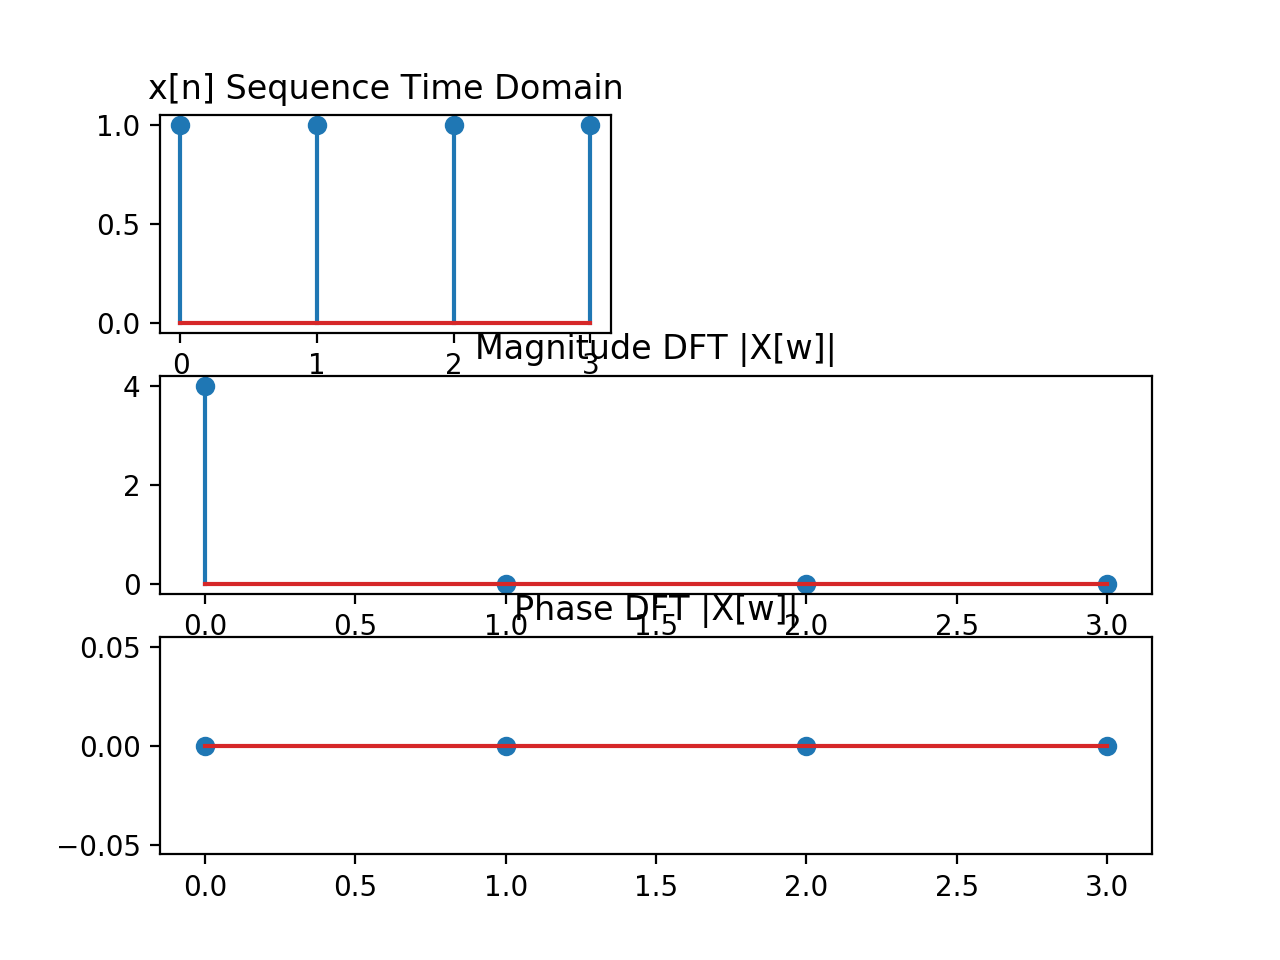

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#1.a create signal
N = 4
x = np.array([1.,1.,1.,1.])
X = np.fft.fft(x,N)

n = np.arange(0,4)
k = n[:]

#sktech
plt.figure()

plt.subplot(321)
plt.stem(n,x)
plt.title('x[n] Sequence Time Domain')

plt.subplot(312)
plt.stem(k,np.abs(X))
plt.title('Magnitude DFT |X[w]|')

plt.subplot(313)
plt.stem(k,np.angle(X))
plt.title('Phase DFT |X[w]|')

<IPython.core.display.Javascript object>


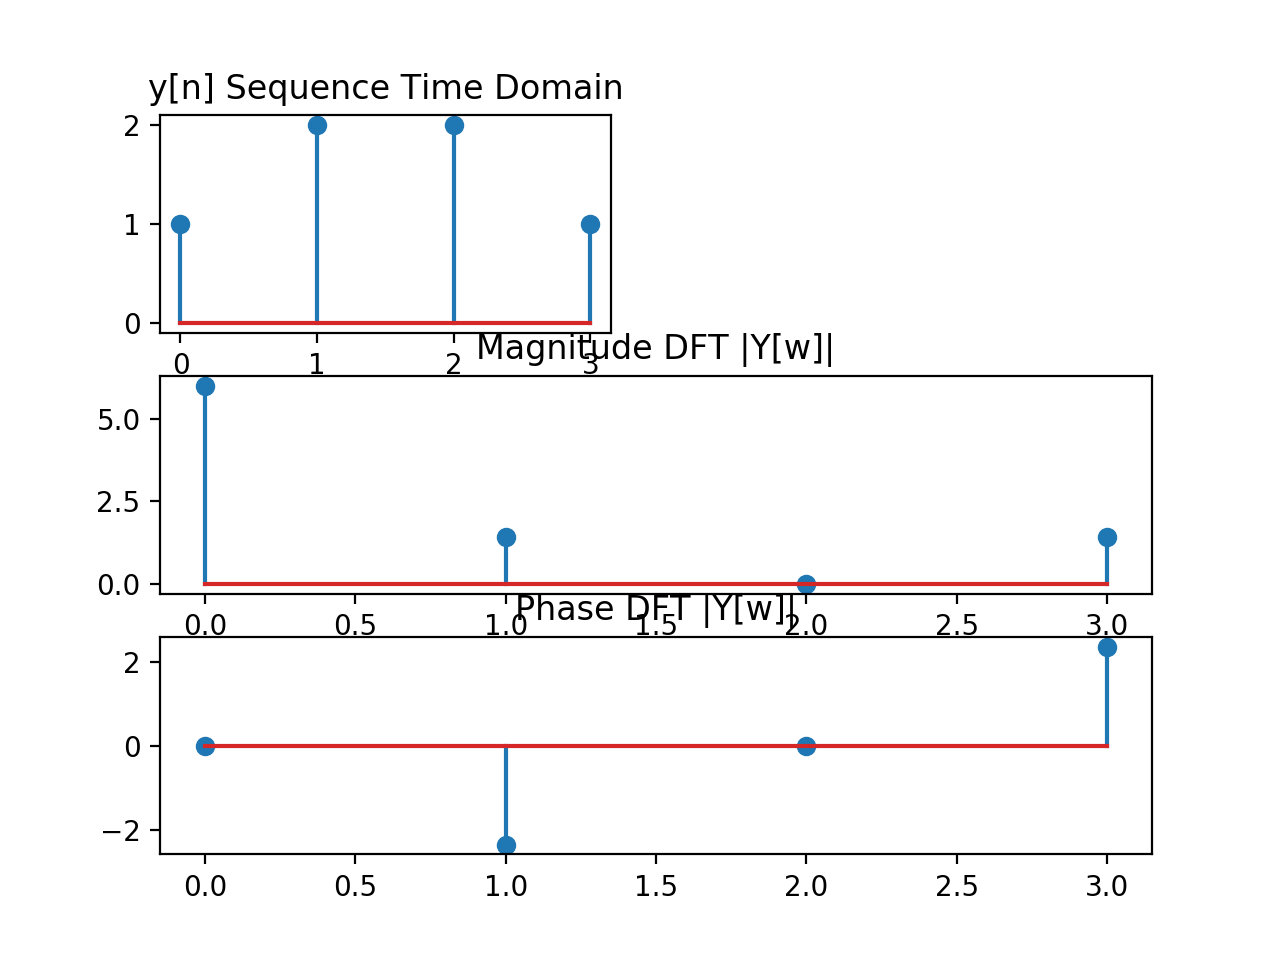

In [5]:
#1.b

#signal
y = np.array([1,2,2,1])

#DFT
Y = np.fft.fft(y,N)
n = np.arange(0,4)
k = n[:]

#sktech
plt.figure()

plt.subplot(321)
plt.stem(n,y)
plt.title('y[n] Sequence Time Domain')

plt.subplot(312)
plt.stem(k,np.abs(Y))
plt.title('Magnitude DFT |Y[w]|')

plt.subplot(313)
plt.stem(k,np.angle(Y))
plt.title('Phase DFT |Y[w]|')

[4.+0.j 0.+0.j 0.+0.j 0.-0.j]
[ 6.+0.j -1.-1.j  0.+0.j -1.+1.j]
[24.+0.j  0.-0.j  0.+0.j  0.+0.j]


<IPython.core.display.Javascript object>


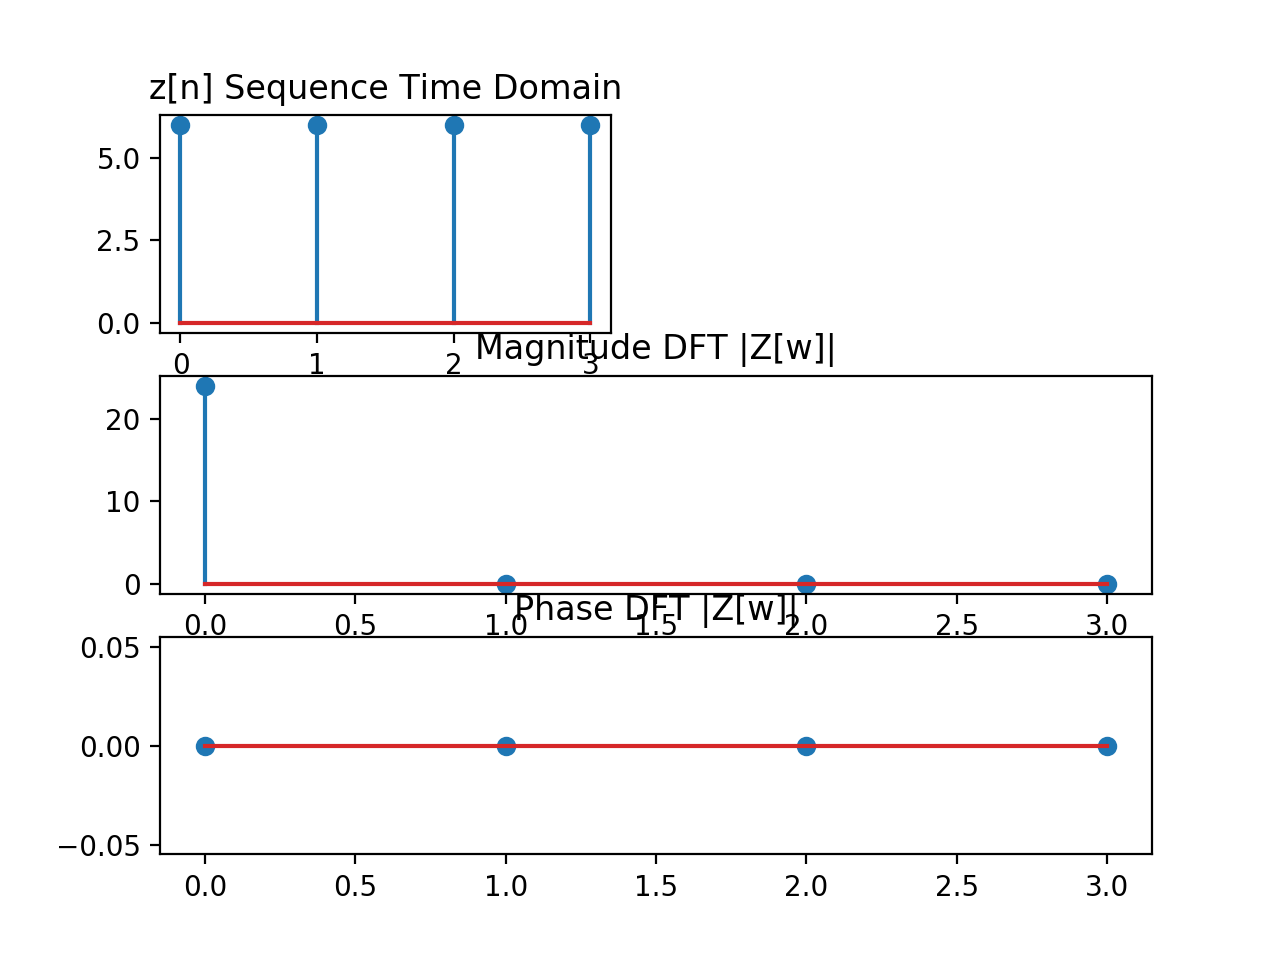

In [8]:
#1.c
#
# Z = X.Y
# z = ifft(Z)


Z = X*Y
print(X)
print(Y)
print(Z)
z = np.fft.ifft(Z)

n = np.arange(0,len(Z))
k = n[:]

plt.figure()

plt.subplot(321)
plt.stem(n,z)
plt.title('z[n] Sequence Time Domain')

plt.subplot(312)
plt.stem(k,np.abs(Z))
plt.title('Magnitude DFT |Z[w]|')

plt.subplot(313)
plt.stem(k,np.angle(Z))
plt.title('Phase DFT |Z[w]|')


<IPython.core.display.Javascript object>


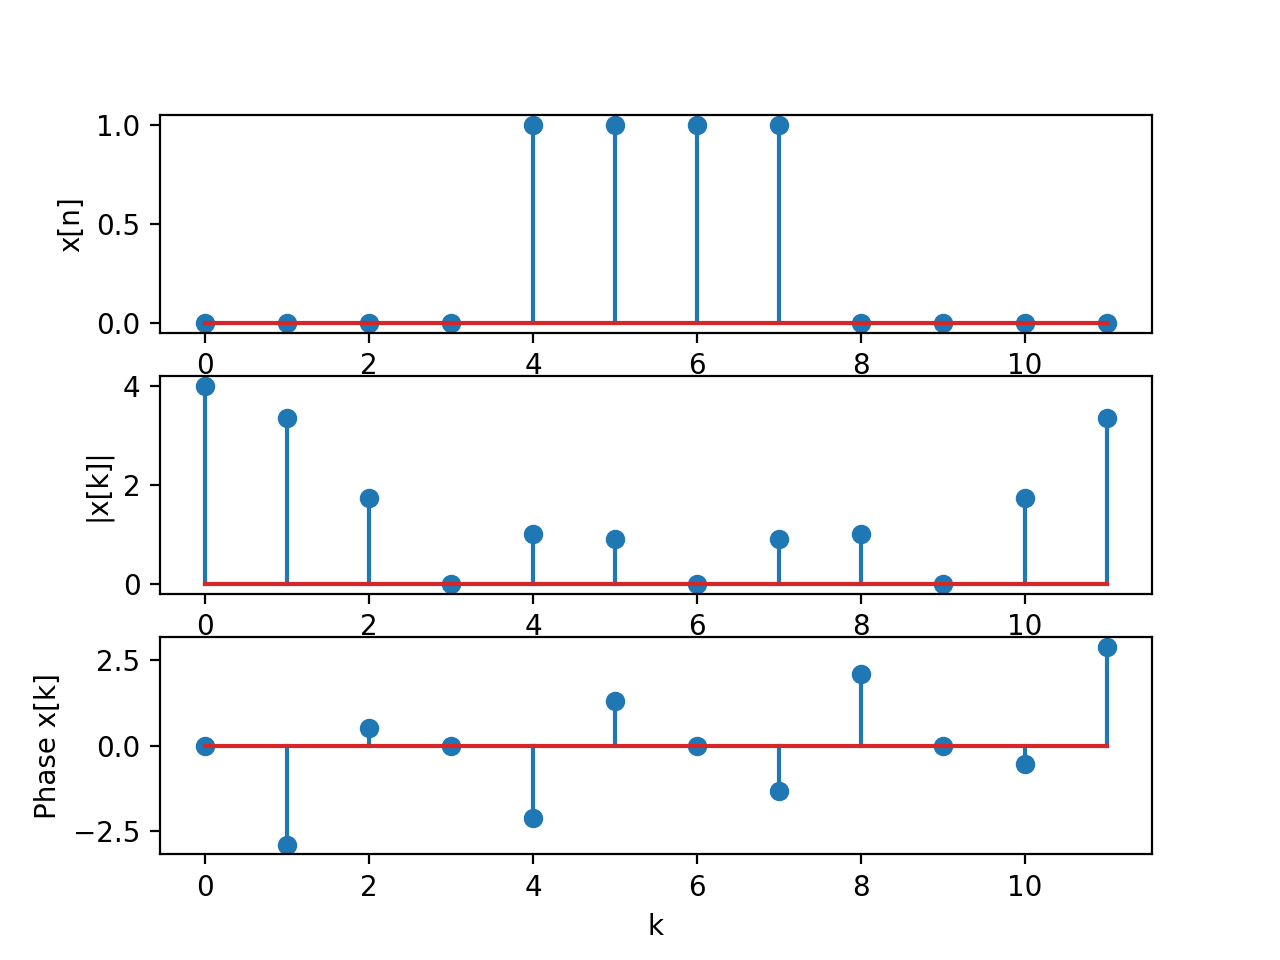

In [14]:
#1.d

#compute the DFT of the following sequence
x = np.array([0,0,0,0,1,1,1,1,0,0,0,0])
X = np.fft.fft(x)

#Sketch
plt.figure()
plt.subplot(311)
plt.stem(x)
plt.xlabel('n')
plt.ylabel('x[n]')
#
plt.subplot(312)
plt.stem(np.abs(X))
plt.xlabel('k');
plt.ylabel('|x[k]|');


plt.subplot(313)
plt.stem(np.angle(X));
plt.xlabel('k');
plt.ylabel('Phase x[k]');






### 1.2 Fourier Transform estimation of continuous-time signals

In this section, we ask the student to estimate the Fourier Transfomr of a continuous-time signal. To do so, first create the following signal with noise added.
```{p}
x = 0.7*sin(2*pi*50*t) + sin(2*pi*120*t)
y = x + 2*randn(size(t))
```

 * Fs = 1 KHz
 * Length  L = 1000 samples

0.001
(1000,)


<IPython.core.display.Javascript object>


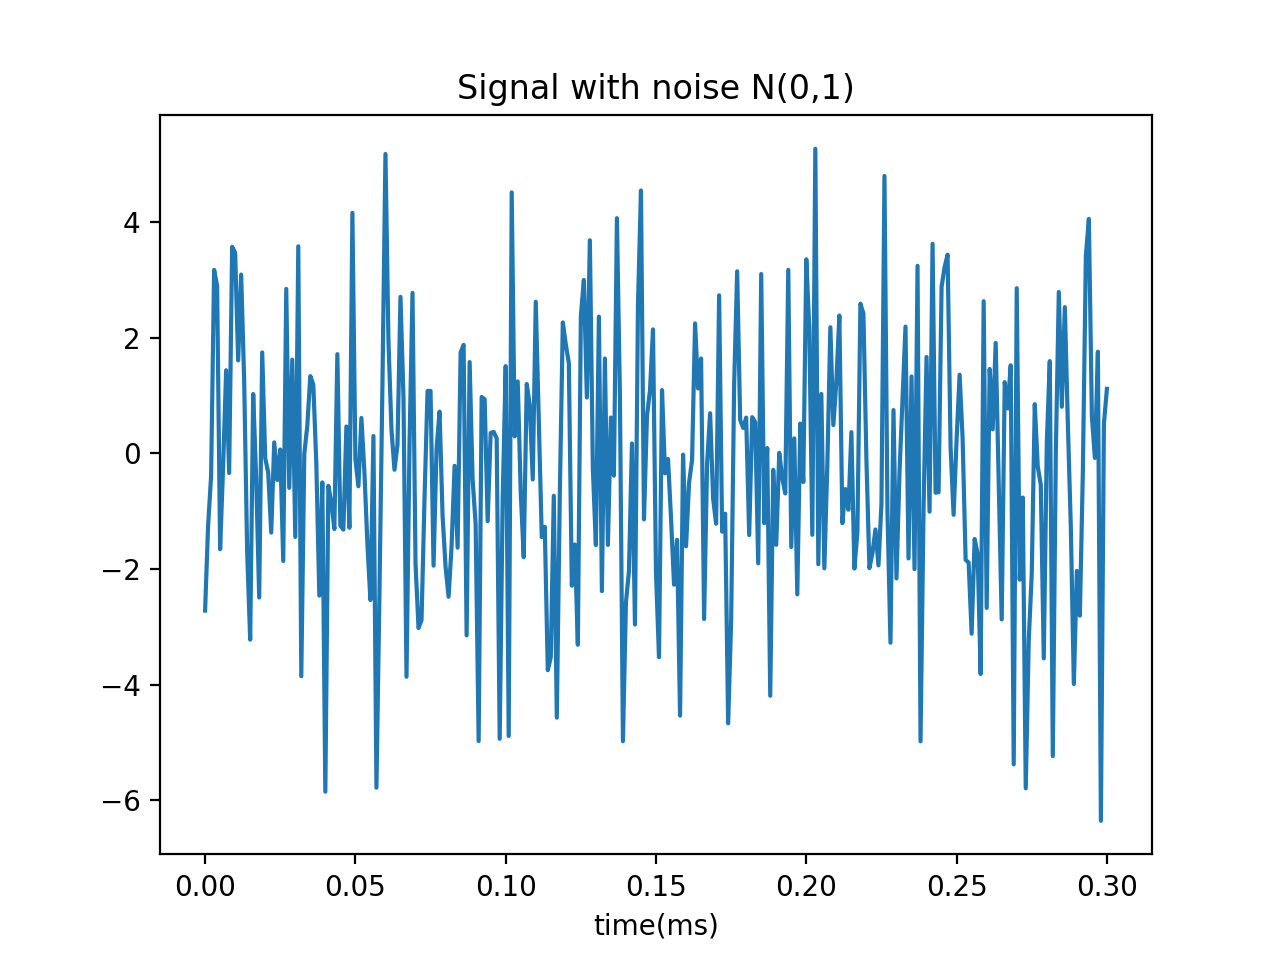

<IPython.core.display.Javascript object>


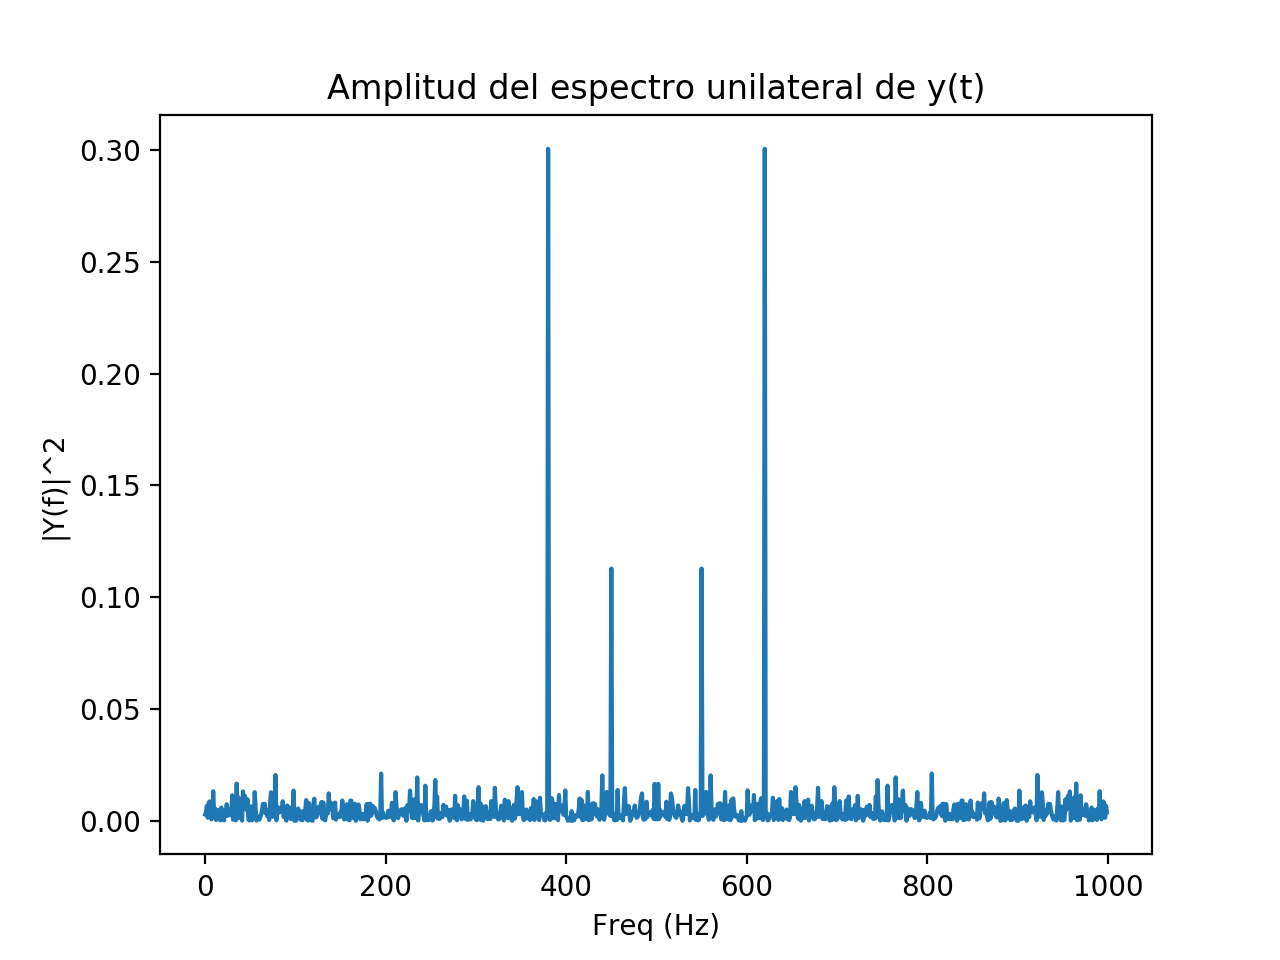

<IPython.core.display.Javascript object>


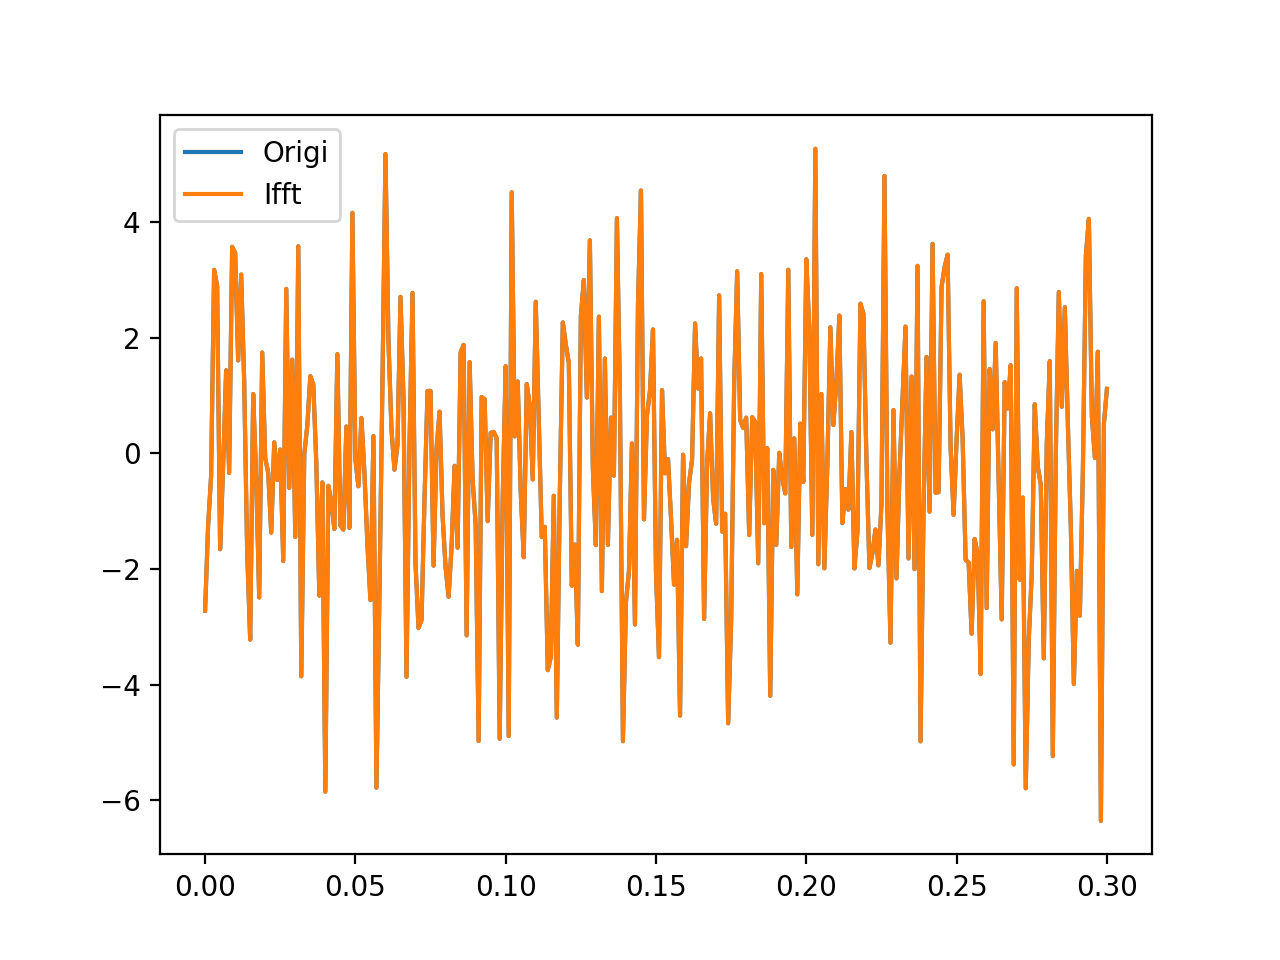

In [34]:
Fs = 1000. # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
print(T)
L = 1000 #Longitud de la señal
t = np.arange(0,L)*T # Vector de tiempo

#Suma de dos sinusoides #adding two sinusoides

x = 0.7*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

#Con ruido o sin ruido
y = x #sin ruido
y = x + 2*np.random.randn(L)    #con ruido

print(y.shape)
#Keep just one segment 
seg = 301 #Tomamos un fragmento

plt.figure()
plt.plot(t[:seg],y[:seg])
plt.title('Signal with noise N(0,1)')
plt.xlabel('time(ms)');

#%NFFT = 2^nextpow2(L);
#NFFT = 2^(10)
NFFT = L
Y = np.fft.fft(y,NFFT)/L
#f = Fs/2*np.linspace(0,1,NFFT/2+1)
#f = np.fft.fftfreq(L,d = 1/Fs)

plt.figure()
#Solo el semieje positivo
plt.plot(abs(np.fft.fftshift(Y))**2) 
plt.title('Amplitud del espectro unilateral de y(t)')
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(f)|^2')

# Vamos a ver como se recupera...
yr = L*np.fft.ifft(Y,NFFT)

plt.figure()
plt.plot(t[:seg],y[:seg])
plt.plot(t[:seg],yr[:seg])
plt.legend(['Origi','Ifft'])

